# Fig 4: Wave Groups in SWOT
##### A.B Villas Bôas, G.Marechal, A Bohé

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Circle
from matplotlib.colors import BoundaryNorm

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

import sys

sys.path.insert(0, '../src')
from src import *

In [2]:
path_out = '../figures/'  # path, where to save the figure?
file_out = 'Fig04_WG.png' # figure name?

### DATA

In [3]:
lon_map_min, lon_map_max, lat_map_min, lat_map_max = -22, -18.8, 47, 49
lon_submap_min, lon_submap_max, lat_submap_min, lat_submap_max = -21.3, -20.6, 47.3, 47.8
props = dict(boxstyle='round', facecolor='w', alpha=1)

#######################################################################################################################################
# ------------------------------------------------------ SWOT ------------------------------------------------------------------------
#######################################################################################################################################

#########
# --- GROUPY
#########
ds_SWOT_group_HS = xr.open_dataset('../data/SWOT/hs_unsmoothed_group.nc')
ds_SWOT_group_SSH = xr.open_dataset('../data/SWOT/ssh_unsmoothed_group.nc')

sub_ds_swot_hs_group = ds_SWOT_group_HS.isel(num_lines = slice(7570, 7700)) # ZOOM #1
sub_sub_ds_swot_hs_group = ds_SWOT_group_HS.isel(num_lines = slice(7593, 7623), num_pixels = slice(6, 17)) # ZOOM #2

#########
# --- NOT GROUPY
#########

ds_SWOT_nogroup_HS = xr.open_dataset('../data/SWOT/hs_unsmoothed_nogroup.nc')
ds_SWOT_nogroup_SSH = xr.open_dataset('../data/SWOT/ssh_unsmoothed_nogroup.nc')

sub_ds_swot_hs_nogroup = ds_SWOT_nogroup_HS.isel(num_lines = slice(7570, 7700)) # ZOOM #1
sub_sub_ds_swot_hs_nogroup = ds_SWOT_nogroup_HS.isel(num_lines = slice(7593, 7623), num_pixels = slice(6, 17))# ZOOM #2

#######################################################################################################################################
# ------------------------------------------------------ SWIM ------------------------------------------------------------------------
#######################################################################################################################################

#########
# --- GROUPY
#########
ds_SWIM_group = xr.open_dataset('../data/SWIM_offnadir/spec_group_SWIM_L2S.nc')
ds_SWIM_alti_group = xr.open_dataset('../data/SWIM_alti/alti_group_SWIM.nc')

#########
# --- NOT GROUPY
#########
ds_SWIM_nogroup = xr.open_dataset('../data/SWIM_offnadir/spec_nogroup_SWIM_L2S.nc')
ds_SWIM_alti_nogroup = xr.open_dataset('../data/SWIM_alti/alti_nogroup_SWIM.nc')



### Fit a plane and remove the trend across-flight for SSH observed by SWOT

In [4]:
# --- Remove the trend within the 50 km swaths
data_group = (ds_SWOT_group_SSH.ssh_karin_2 - ds_SWOT_group_SSH.mean_sea_surface_cnescls).values
data_nogroup = (ds_SWOT_nogroup_SSH.ssh_karin_2 - ds_SWOT_nogroup_SSH.mean_sea_surface_cnescls).values

ssh_data_group = remove_linear_trend(data_group)
ssh_data_nogroup = remove_linear_trend(data_nogroup)

### Compute Bulk Param from spectra observed by SWIM

In [5]:
theta_swim_group, sub_k_group, e_kth_group, Lp_group, Dp_group, the_mp_group, sigp_group, Qp_group, Qkk_group = compute_bulk_l2s_SWIM_group(ds_SWIM_group, 22) # Compute Bulk and wave spectrum from SWIM - Groupy
theta_swim_nogroup, sub_k_nogroup, e_kth_nogroup, Lp_nogroup, Dp_nogroup, the_mp_nogroup, sigp_nogroup, Qp_nogroup, Qkk_nogroup = compute_bulk_l2s_SWIM_group(ds_SWIM_nogroup, 50) # Compute Bulk and wave spectrum from SWIM - Not Groupy


Qkk = 88.84944438755902
Qkk = 16.758794309782942


### Create circles for plots

In [6]:
center_lon1, center_lat1 = -21, 47.37
center_lon2, center_lat2 = -21.01, 47.75

center_lon3, center_lat3 = -20.92, 47.47
center_lon4, center_lat4 = -20.81, 47.78
#fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (10, 10), sharey='row')
radius_deg = 0.03

### Figure

/var/folders/bx/gz6w8d_533x2h1m1pq2pt88m0000gn/T/ipykernel_67994/2120827211.py:189: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad = .8)


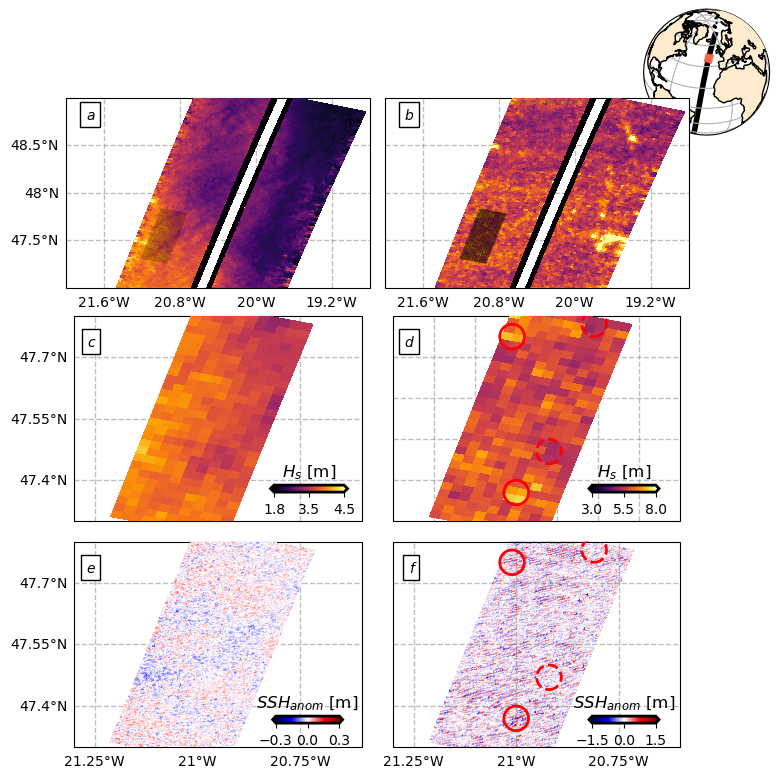

In [7]:
fig = plt.figure(figsize = (7, 7))

# Just for vizualization (I re-mask artefacts that come from the data processing)
sub_ds_swot_hs_nogroup.swh_karin.values[:, 57] = sub_ds_swot_hs_nogroup.swh_karin.values[:, 58]
sub_ds_swot_hs_nogroup.swh_karin.values[:, 56] = sub_ds_swot_hs_nogroup.swh_karin.values[:, 55]


#######################################################################################################################################
# -------------------------------- Significant Wave Height (SWOT + SWIM: Groupy) --------------------------------
#######################################################################################################################################

# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_map_min, lon_map_max, lat_map_min, lat_map_max], crs=ccrs.PlateCarree())

ax.text(-21.7, 48.75, 'a', ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')      
gl.xlocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two
gl.ylocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two

# ---- Activate deactivate labels
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True
gl.top_labels = False

bounds = np.r_[np.linspace(1.8, 2.8, 40), np.linspace(2.8, 4.5, 216)]  # non continuous colormap
norm = BoundaryNorm(bounds, 256)


# ---- Plot
p1 = ax.pcolor(sub_ds_swot_hs_nogroup.longitude,  sub_ds_swot_hs_nogroup.latitude, sub_ds_swot_hs_nogroup.swh_karin, norm = norm, cmap = 'inferno', zorder = 3)
ax.plot(sub_sub_ds_swot_hs_group.longitude-360,  sub_sub_ds_swot_hs_group.latitude, color = 'k', alpha = .2, zorder = 4, linewidth = 2.1)
# ax.scatter(ds_SWIM_alti_nogroup.longitude.values, ds_SWIM_alti_nogroup.latitude.values, c = ds_SWIM_alti_nogroup.swh.values, vmin = 2, vmax = 5, cmap = 'inferno', zorder = 5)

# ax.text(342.-360, 48.75, "$\lambda_{p}$ = %.0f m\n$Q_{kk}$ = %.0f m"%(Lp_group, Qkk_group),\
#                 bbox=props) # Bulk parameters for group case


#######################################################################################################################################
# -------------------------------- Significant Wave Height (SWOT + SWIM: Not Groupy) --------------------------------
#######################################################################################################################################
# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([lon_map_min, lon_map_max, lat_map_min, lat_map_max], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')     

gl.xlocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two
gl.ylocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two

# ---- Activate deactivate labels
gl.right_labels =False
gl.left_labels =False
gl.bottom_labels =True
gl.top_labels =False

ax.text(-21.7, 48.75, 'b',  ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})
# --- Plot

# ax.scatter(ds_SWIM_alti_group.longitude.values, ds_SWIM_alti_group.latitude.values, c = ds_SWIM_alti_group.swh.values, vmin = 3, vmax = 8, cmap = 'inferno', zorder = 3)
p1 = ax.pcolor(sub_ds_swot_hs_group.longitude,  sub_ds_swot_hs_group.latitude, sub_ds_swot_hs_group.swh_karin, vmin = 3, vmax = 8, cmap = 'inferno', zorder = 4)
ax.plot(sub_sub_ds_swot_hs_group.longitude-360,  sub_sub_ds_swot_hs_group.latitude, color = 'k', alpha = .5, zorder = 5, linewidth = 2.1)


# ax.text(336.-360, 48.75, "$\lambda_{p}$ = %.0f m\n$Q_{kk}$ = %.0f m"%(Lp_nogroup, Qkk_nogroup),\
#                 bbox=props) # for group

#######################################################################################################################################
# -------------------------------- ZOOM Significant Wave Height (SWOT: Groupy) --------------------------------
#######################################################################################################################################
# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree())
ax.set_extent([lon_submap_min, lon_submap_max, lat_submap_min, lat_submap_max], crs=ccrs.PlateCarree())



gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')



gl.xlocator = plt.MaxNLocator(nbins=3)  # Display one tick label out of two
gl.ylocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two

# ---- Activate deactivate labels
gl.right_labels =False
gl.left_labels =True
gl.bottom_labels =False
gl.top_labels =False


# --- Plot
p1 = ax.pcolor(sub_sub_ds_swot_hs_nogroup.longitude,  sub_sub_ds_swot_hs_nogroup.latitude, sub_sub_ds_swot_hs_nogroup.swh_karin, norm=norm, cmap = 'inferno', zorder = 4)



# --- Colorbar Settings
cax = fig.add_axes([.387, .41, .11, 0.01])
cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', extend = 'both', ticks = [1.8, 3.5, 4.5])
cbar.minorticks_off() 
cbar.outline.set_linewidth(2)  # Adjust the width as needed
cbar.ax.set_title('$H_s$ [m]')
cbar.ax.tick_params(labelsize=10)




ax.text(-21.25, 47.72, 'c', ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})


#######################################################################################################################################
# -------------------------------- ZOOM Significant Wave Height (SWOT: Not Groupy) --------------------------------
#######################################################################################################################################
# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree())
ax.set_extent([lon_submap_min, lon_submap_max, lat_submap_min, lat_submap_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

# ---- Activate deactivate labels
gl.right_labels =False
gl.left_labels =False
gl.bottom_labels =False
gl.top_labels =False


# --- Plot
p1 = ax.pcolor(sub_sub_ds_swot_hs_group.longitude,  sub_sub_ds_swot_hs_group.latitude, sub_sub_ds_swot_hs_group.swh_karin, vmin = 3, vmax = 8, cmap = 'inferno', zorder = 4)

# -- Colorbar settings

cax = fig.add_axes([.842, .41, .1, 0.01])
cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', extend = 'both', ticks = [3, 5.5, 8])

cbar.outline.set_linewidth(2)  # Adjust the width as needed
cbar.ax.set_title('$H_s$ [m]')
cbar.ax.tick_params(labelsize=10)

# -- Draw circle over group crests and group troughs
circle1 = Circle((center_lon1, center_lat1), radius_deg, fill=False, linestyle='-', linewidth=2, zorder = 10) # circle 1
circle2 = Circle((center_lon2, center_lat2), radius_deg, fill=False, linestyle='-', linewidth=2, zorder = 10) # circle 2
circle3 = Circle((center_lon3, center_lat3), radius_deg, fill=False, linestyle='--', linewidth=2, zorder = 10) # circle 3
circle4 = Circle((center_lon4, center_lat4), radius_deg, fill=False, linestyle='--', linewidth=2, zorder = 10) # circle 4

ax.add_patch(circle1)
circle1.set_edgecolor('red')
ax.add_patch(circle2)
circle2.set_edgecolor('red')
ax.add_patch(circle3)
circle3.set_edgecolor('red')
ax.add_patch(circle4)
circle4.set_edgecolor('red')





ax.text(-21.25, 47.72, 'd',  ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})
#######################################################################################################################################
# -------------------------------- ZOOM Sea Surface Elevation (SWOT: Groupy) --------------------------------
#######################################################################################################################################
# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 5, projection=ccrs.PlateCarree())
ax.set_extent([lon_submap_min, lon_submap_max, lat_submap_min, lat_submap_max], crs=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')


gl.xlocator = plt.MaxNLocator(nbins=3)  # Display one tick label out of two
gl.ylocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two
# ---- Activate deactivate labels

gl.right_labels = False
gl.left_labels = True
gl.bottom_labels =True
gl.top_labels =False


p1 = ax.pcolor(ds_SWOT_nogroup_SSH.longitude,  ds_SWOT_nogroup_SSH.latitude, ssh_data_nogroup, vmin = -.3, vmax = .3, cmap = 'seismic', zorder = 4)
fig.tight_layout(pad = .8)

ax.text(-21.25, 47.72, 'e', ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})

# --- Colorbar settings
cax = fig.add_axes([.39, .08, .1, 0.01])
cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', extend = 'both', ticks = [-.3, 0, .3])
cbar.outline.set_linewidth(2)  # Adjust the width as needed
cbar.ax.set_title('$SSH_{anom}$ [m]')
cbar.ax.tick_params(labelsize=10)



##################################################################################################################
# -------------------------------- ZOOM Sea Surface Elevation (SWOT: Not Groupy) --------------------------------
##################################################################################################################

# ---- Cartopy projection
ax = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree())

ax.set_extent([lon_submap_min, lon_submap_max, lat_submap_min, lat_submap_max], crs=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = plt.MaxNLocator(nbins=3)  # Display one tick label out of two
gl.ylocator = plt.MaxNLocator(nbins=4)  # Display one tick label out of two

# --- Activate deactivate axis labels
gl.right_labels = False
gl.left_labels = False
gl.bottom_labels = True
gl.top_labels = False

# -- Plot

p1 = ax.pcolor(ds_SWOT_group_SSH.longitude.values, ds_SWOT_group_SSH.latitude.values, ssh_data_group, vmin = -1.5, vmax = 1.5, cmap = 'seismic')


# -- Draw circle over group crests and group troughs
circle1 = Circle((center_lon1, center_lat1), radius_deg, fill=False, linestyle='-', linewidth=2, zorder = 10) # circle 1
circle2 = Circle((center_lon2, center_lat2), radius_deg, fill=False, linestyle='-', linewidth=2, zorder = 10) # circle 2
circle3 = Circle((center_lon3, center_lat3), radius_deg, fill=False, linestyle='--', linewidth=2, zorder = 10) # circle 3
circle4 = Circle((center_lon4, center_lat4), radius_deg, fill=False, linestyle='--', linewidth=2, zorder = 10) # circle 4

ax.add_patch(circle1)
circle1.set_edgecolor('red')
ax.add_patch(circle2)
circle2.set_edgecolor('red')
ax.add_patch(circle3)
circle3.set_edgecolor('red')
ax.add_patch(circle4)
circle4.set_edgecolor('red')




# --- Colorbar settings


cax = fig.add_axes([.842, .08, .1, 0.01])

cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal', extend = 'both', ticks = [-1.5, 0, 1.5])
cbar.outline.set_linewidth(2)  # Adjust the width as needed
cbar.ax.set_title('$SSH_{anom}$ [m]')
cbar.ax.tick_params(labelsize=10)


ax.text(-21.25, 47.72, 'f', ha='right', va='bottom', 
         style='italic', bbox={'facecolor':'white', 'alpha':1})


###################################################################################
# -------------------------------- Inset for Earth --------------------------------
####################################################################################
ax_inset = fig.add_axes([.92, .92, .18, .18], projection=ccrs.Orthographic(-24, 35))
ds_swot_hs_group_plot = ds_SWOT_group_HS.sel(num_lines=slice(0, 8999))
crs = ccrs.RotatedPole(pole_longitude=-24, pole_latitude=35)



ax_inset.add_feature(cfeature.LAND,zorder=5,color='blanchedalmond')
ax_inset.add_feature(cfeature.COASTLINE, zorder = 6)


ax_inset.plot(sub_sub_ds_swot_hs_group.longitude[:,0]-360, sub_sub_ds_swot_hs_group.latitude[:,0], color='tomato', linewidth = 6, transform=ccrs.PlateCarree())
ax_inset.plot(ds_swot_hs_group_plot.longitude[:,0]-360, ds_swot_hs_group_plot.latitude[:,0], color='k', linewidth = 4, zorder = 0, transform=ccrs.PlateCarree())

ax_inset.set_global()
ax_inset.gridlines()

ax_inset.set_zorder(-1)  # Make sure this is below the plot
plt.subplots_adjust(wspace=.05, hspace=0.1)
#plt.savefig('/Users/gwen29360/Desktop/POSTDOC/Mines/S_MODE/figures/Paper/v3_paper/swot_wave_group_qkk.png', dpi = 300, bbox_inches = 'tight')
plt.savefig(path_out + file_out, dpi = 300, bbox_inches = 'tight')
